# Script for processing GC and RRIV data to calculate calibration equations according to the Bastviken paper ()

# Runs the file containing general functions used in this script
## By default this is a file called "methane_functions.r" in the working directory of this script
## Do NOT change the working directory at any point while using this script.

In [191]:
methaneFunctions<-paste(getwd(),"/methane_functions.r",sep="")
methaneFunctions
if (file.exists(methaneFunctions)) {
    source(methaneFunctions)
} else {
    print("manually correct the location and/or name of methane_functions.r")
}

[1] "/home/pleocavee/Documents/github/SensorDataProcessing/rriv_methane/methane_functions.r"

# Load packages

In [91]:
# Package names
packages <- c("dplyr", "doBy", "lubridate", "ggplot2", "Hmisc", "zoo", "viridis")
packageHandler(packages)

In [92]:
directory<-"~/Desktop/data/Methane Calibration/"

# read in the calibration file that has GC and RRIV data

In [5]:
calFile<-"~/Desktop/data/Methane Calibration/GC Calibration Sample Log - GC_RRIV_data.csv"
calData<-read.csv(calFile)

In [6]:
calData

Sample.ID,Sensor.UUID,Date.Collected,Time.Collected,target.ch4.ppm,volume..mL.,mL.injected,CH4.injected..ppm.,calculated.ppm,gc.ch4.ppm,⋯,dht_C,dht_RH,relative_hour,dht_K,ews_mbar,ews_kPa,H2O_mol,BDA_mol,MW_gas,aH_gm3
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CH001.gcd,57FF70068387575129270167,2023-02-21,12:03,1000,810,1.0,1000000,1235,959.09528600,⋯,25.400,23.100,last hour,298.550,20.61856,2.061856,0.4700604,0.5299396,23.82062,3.456767
CH002.gcd,57FF6C068387575136470767,2023-02-21,12:04,1000,810,1.0,1000000,1235,1079.53234000,⋯,23.300,17.810,last hour,296.450,16.41796,1.641796,0.2885803,0.7114197,25.80868,2.137217
CH003.gcd,50FF6F068678545226521667,2023-02-21,12:05,1000,810,1.0,1000000,1235,635.96323600,⋯,23.500,29.100,last hour,296.650,16.78069,1.678069,0.4819324,0.5180676,23.69057,3.566771
CH004.gcd,50FF6C068678545210222467,2023-02-21,12:06,1000,920,1.0,1000000,1087,644.93604100,⋯,21.300,31.700,last hour,294.450,13.17098,1.317098,0.4120604,0.5879396,24.45599,3.072436
CH005.gcd,57FF6E068387575145101167,2023-02-21,12:08,1000,920,1.0,1000000,1087,626.97373900,⋯,21.600,28.692,last hour,294.750,13.61653,1.361653,0.3855765,0.6144235,24.74612,2.872038
CH006.gcd,57FF74068387575109431367,2023-02-21,12:09,1000,920,1.0,1000000,1087,599.08165400,⋯,21.100,30.090,last hour,294.250,12.88154,1.288154,0.3825369,0.6174631,24.77942,2.854239
1221314.gcd,57FF70068387575129270167,2023-02-22,13:14,100,810,0.1,1000000,123,45.18918274,⋯,23.100,23.710,last hour,296.250,16.06255,1.606255,0.3758628,0.6241372,24.85253,2.785508
2221315.gcd,57FF6C068387575136470767,2023-02-22,13:15,100,810,0.1,1000000,123,73.75139998,⋯,24.300,16.300,last hour,297.450,18.30748,1.830748,0.2945097,0.7054903,25.74373,2.173797
3221316.gcd,50FF6F068678545226521667,2023-02-22,13:16,100,810,0.1,1000000,123,39.07679862,⋯,23.510,28.960,last hour,296.660,16.79902,1.679902,0.4801378,0.5198622,23.71023,3.553369


In [7]:
str(calData)

'data.frame':	54 obs. of  35 variables:
 $ Sample.ID         : chr  "CH001.gcd" "CH002.gcd" "CH003.gcd" "CH004.gcd" ...
 $ Sensor.UUID       : chr  "57FF70068387575129270167" "57FF6C068387575136470767" "50FF6F068678545226521667" "50FF6C068678545210222467" ...
 $ Date.Collected    : chr  "2023-02-21" "2023-02-21" "2023-02-21" "2023-02-21" ...
 $ Time.Collected    : chr  "12:03" "12:04" "12:05" "12:06" ...
 $ target.ch4.ppm    : int  1000 1000 1000 1000 1000 1000 100 100 100 100 ...
 $ volume..mL.       : int  810 810 810 920 920 920 810 810 810 920 ...
 $ mL.injected       : num  1 1 1 1 1 1 0.1 0.1 0.1 0.1 ...
 $ CH4.injected..ppm.: int  1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000 1000000 ...
 $ calculated.ppm    : int  1235 1235 1235 1087 1087 1087 123 123 123 109 ...
 $ gc.ch4.ppm        : num  959 1080 636 645 627 ...
 $ Date.Run          : chr  "2023-02-21" "2023-02-21" "2023-02-21" "2023-02-21" ...
 $ Sensor            : chr  "CH001" "CH002" "CH003" "CH

# Process columns

In [8]:
calData$Sensor.UUID<-as.factor(calData$Sensor.UUID)
calData$Sensor<-as.factor(calData$Sensor)
calData$uuid<-as.factor(calData$uuid)
calData$time.h<-lubridate::as_datetime(calData$time.h)

# Use predict() to get the V0 for each observation based on respective sensor (CH001 - CH006)

In [93]:
v0LMFile<-"~/Desktop/data/Methane Calibration/methane_calibration_v0_output/V0_lm_CH001-CH006.rds"
calData<-calcV0(calData, v0LMFile)
head(calData)

[1] "CH001"

Call:
lm(formula = ch4_raw ~ dht_C * aH_gm3, data = subset)

Coefficients:
 (Intercept)         dht_C        aH_gm3  dht_C:aH_gm3  
      925.61        -66.84       2048.70        -50.48  

[1] "CH002"

Call:
lm(formula = ch4_raw ~ dht_C * aH_gm3, data = subset)

Coefficients:
 (Intercept)         dht_C        aH_gm3  dht_C:aH_gm3  
     447.524        20.447       334.416        -8.043  

[1] "CH003"

Call:
lm(formula = ch4_raw ~ dht_C * aH_gm3, data = subset)

Coefficients:
 (Intercept)         dht_C        aH_gm3  dht_C:aH_gm3  
    315.3680       -0.3705      138.8468       -3.1268  

[1] "CH004"

Call:
lm(formula = ch4_raw ~ dht_C * aH_gm3, data = subset)

Coefficients:
 (Intercept)         dht_C        aH_gm3  dht_C:aH_gm3  
     408.379         3.647        36.874        -0.443  

[1] "CH005"

Call:
lm(formula = ch4_raw ~ dht_C * aH_gm3, data = subset)

Coefficients:
 (Intercept)         dht_C        aH_gm3  dht_C:aH_gm3  
    506.1896        0.7614       77.7694   

,Sample.ID,Sensor.UUID,Date.Collected,Time.Collected,target.ch4.ppm,volume..mL.,mL.injected,CH4.injected..ppm.,calculated.ppm,gc.ch4.ppm,⋯,dht_RH,relative_hour,dht_K,ews_mbar,ews_kPa,H2O_mol,BDA_mol,MW_gas,aH_gm3,v0
,<chr>,<fct>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CH001.gcd,57FF70068387575129270167,2023-02-21,12:03,1000,810,1,1000000,1235,959.0953,⋯,23.100,last hour,298.55,20.61856,2.061856,0.4700604,0.5299396,23.82062,3.456767,1877.9499
2,CH002.gcd,57FF6C068387575136470767,2023-02-21,12:04,1000,810,1,1000000,1235,1079.5323,⋯,17.810,last hour,296.45,16.41796,1.641796,0.2885803,0.7114197,25.80868,2.137217,1238.1248
3,CH003.gcd,50FF6F068678545226521667,2023-02-21,12:05,1000,810,1,1000000,1235,635.9632,⋯,29.100,last hour,296.65,16.78069,1.678069,0.4819324,0.5180676,23.69057,3.566771,539.8133
4,CH004.gcd,50FF6C068678545210222467,2023-02-21,12:06,1000,920,1,1000000,1087,644.9360,⋯,31.700,last hour,294.45,13.17098,1.317098,0.4120604,0.5879396,24.45599,3.072436,570.3620
5,CH005.gcd,57FF6E068387575145101167,2023-02-21,12:08,1000,920,1,1000000,1087,626.9737,⋯,28.692,last hour,294.75,13.61653,1.361653,0.3855765,0.6144235,24.74612,2.872038,635.5348
6,CH006.gcd,57FF74068387575109431367,2023-02-21,12:09,1000,920,1,1000000,1087,599.0817,⋯,30.090,last hour,294.25,12.88154,1.288154,0.3825369,0.6174631,24.77942,2.854239,582.6045


## Locate and read in .rds file with linear models for CH001 - CH006

In [94]:
# lm_dir<-"~/Desktop/data/Methane Calibration/methane_calibration_v0_output"
# lm_rds<-list.files(lm_dir, pattern=".rds", full.names=TRUE)
# lm_rds

In [95]:
# v0_lm<-readRDS(lm_rds)
# v0_lm

In [96]:
# str(v0_lm)

In [97]:
# v0_lm["CH001"]

In [13]:
# sensors<-unique(calData$Sensor)

In [54]:
# calcV0<-function(df){
#     output<-data.frame()
#     sensors<-unique(df$Sensor)
#     for(sensor in sensorList){
#         print(sensor)
#         lm<-v0_lm[[sensor]][["interactive"]]
#         print(lm)
#         temp<-df[df$Sensor == sensor,]
#         temp$v0<-predict(lm, newdata=temp)
#         output<-rbind(output,temp)
#     }
#     return(output)
# }

In [98]:
# output<-data.frame()
# for(sensor in sensors){
#     print(sensor)
#     lm<-v0_lm[[sensor]][["interactive"]]
#     print(lm)
#     temp<-calData[calData$Sensor == sensor,]
#     temp$v0<-predict(lm, newdata=temp)
#     output<-rbind(output,temp)
# }

In [113]:
output<-calData
output

Sample.ID,Sensor.UUID,Date.Collected,Time.Collected,target.ch4.ppm,volume..mL.,mL.injected,CH4.injected..ppm.,calculated.ppm,gc.ch4.ppm,⋯,dht_RH,relative_hour,dht_K,ews_mbar,ews_kPa,H2O_mol,BDA_mol,MW_gas,aH_gm3,v0
<chr>,<fct>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CH001.gcd,57FF70068387575129270167,2023-02-21,12:03,1000,810,1.0,1000000,1235,959.09528600,⋯,23.100,last hour,298.550,20.61856,2.061856,0.4700604,0.5299396,23.82062,3.456767,1877.9499
CH002.gcd,57FF6C068387575136470767,2023-02-21,12:04,1000,810,1.0,1000000,1235,1079.53234000,⋯,17.810,last hour,296.450,16.41796,1.641796,0.2885803,0.7114197,25.80868,2.137217,1238.1248
CH003.gcd,50FF6F068678545226521667,2023-02-21,12:05,1000,810,1.0,1000000,1235,635.96323600,⋯,29.100,last hour,296.650,16.78069,1.678069,0.4819324,0.5180676,23.69057,3.566771,539.8133
CH004.gcd,50FF6C068678545210222467,2023-02-21,12:06,1000,920,1.0,1000000,1087,644.93604100,⋯,31.700,last hour,294.450,13.17098,1.317098,0.4120604,0.5879396,24.45599,3.072436,570.3620
CH005.gcd,57FF6E068387575145101167,2023-02-21,12:08,1000,920,1.0,1000000,1087,626.97373900,⋯,28.692,last hour,294.750,13.61653,1.361653,0.3855765,0.6144235,24.74612,2.872038,635.5348
CH006.gcd,57FF74068387575109431367,2023-02-21,12:09,1000,920,1.0,1000000,1087,599.08165400,⋯,30.090,last hour,294.250,12.88154,1.288154,0.3825369,0.6174631,24.77942,2.854239,582.6045
1221314.gcd,57FF70068387575129270167,2023-02-22,13:14,100,810,0.1,1000000,123,45.18918274,⋯,23.710,last hour,296.250,16.06255,1.606255,0.3758628,0.6241372,24.85253,2.785508,1840.4547
2221315.gcd,57FF6C068387575136470767,2023-02-22,13:15,100,810,0.1,1000000,123,73.75139998,⋯,16.300,last hour,297.450,18.30748,1.830748,0.2945097,0.7054903,25.74373,2.173797,1246.4647
3221316.gcd,50FF6F068678545226521667,2023-02-22,13:16,100,810,0.1,1000000,123,39.07679862,⋯,28.960,last hour,296.660,16.79902,1.679902,0.4801378,0.5198622,23.71023,3.553369,538.8224


In [16]:
saveDFcsv(output, "calibrationData", od=directory)
saveDFrds(output, "calibrationData", od=directory)

[1] "~/Desktop/data/Methane Calibration/output_calibrationData.csv"
[1] "~/Desktop/data/Methane Calibration/output_calibrationData.rds"


# basic plots

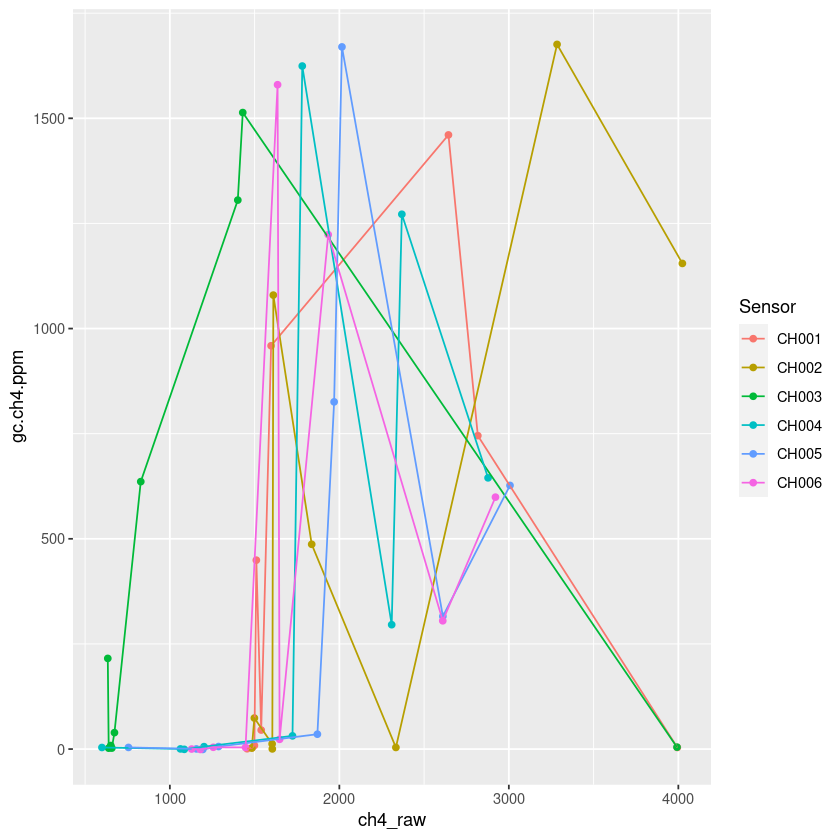

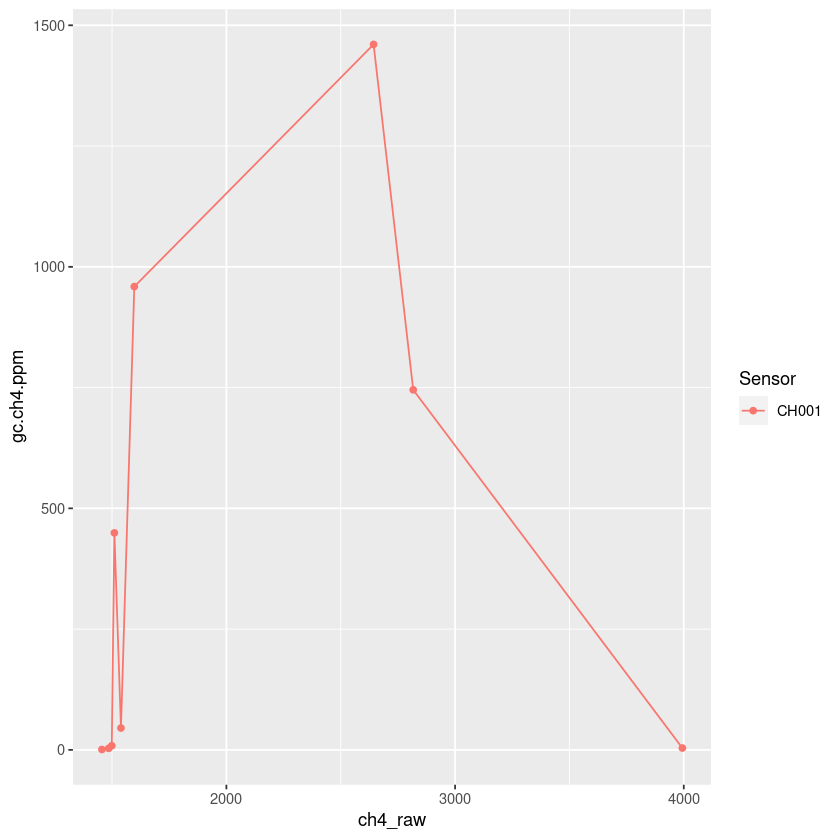

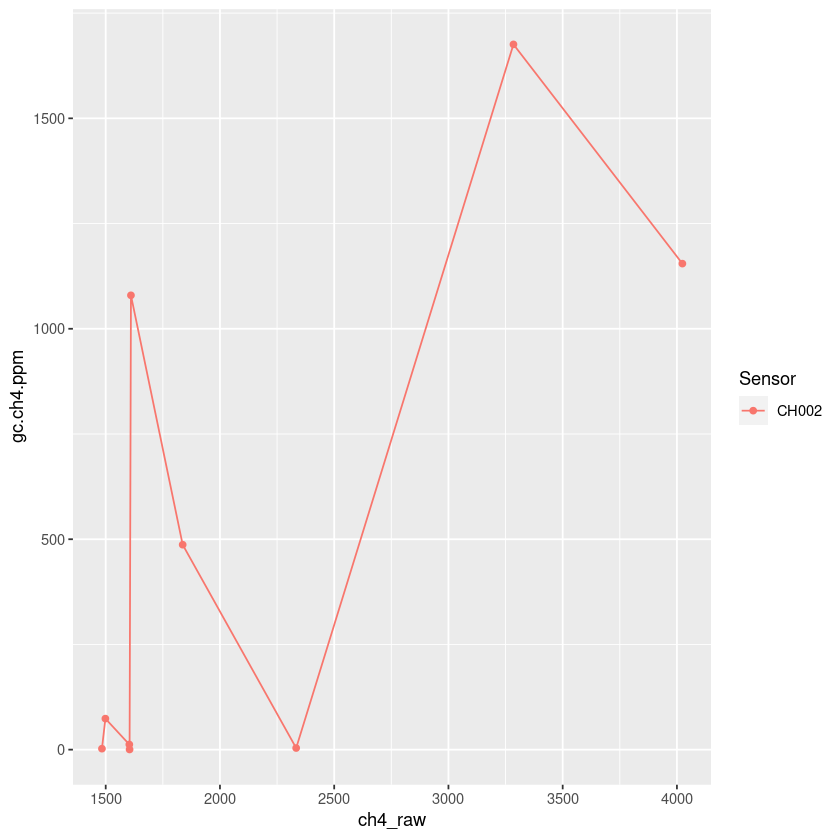

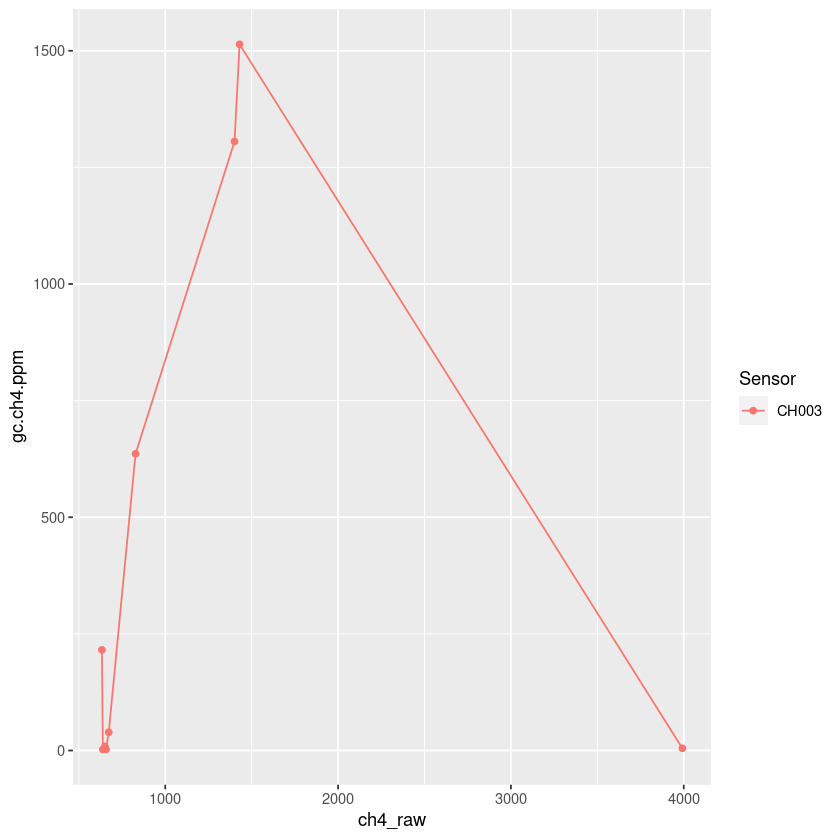

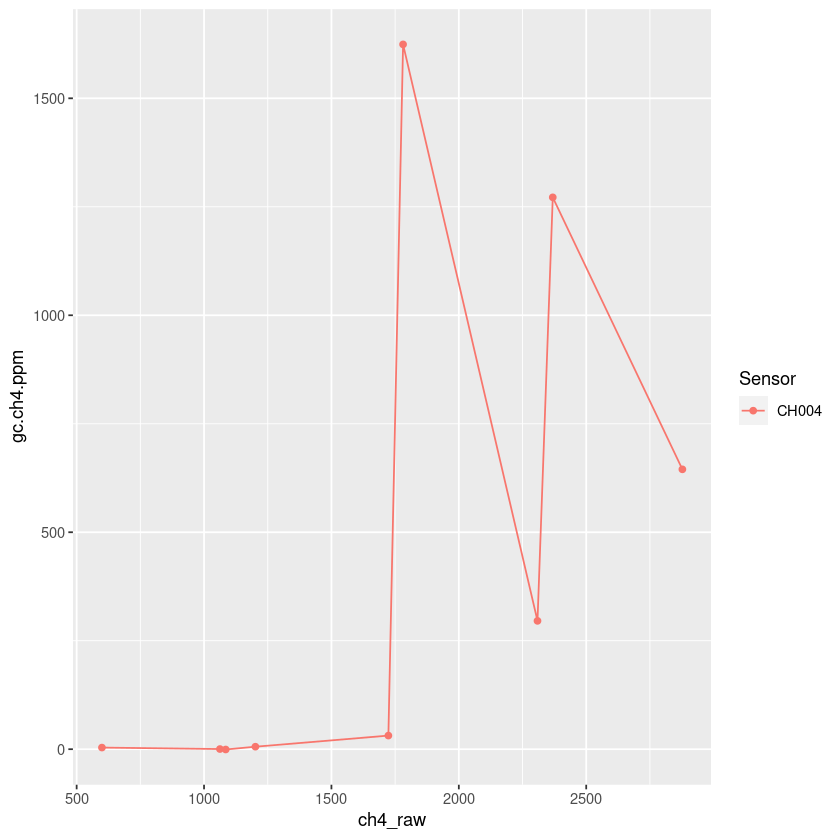

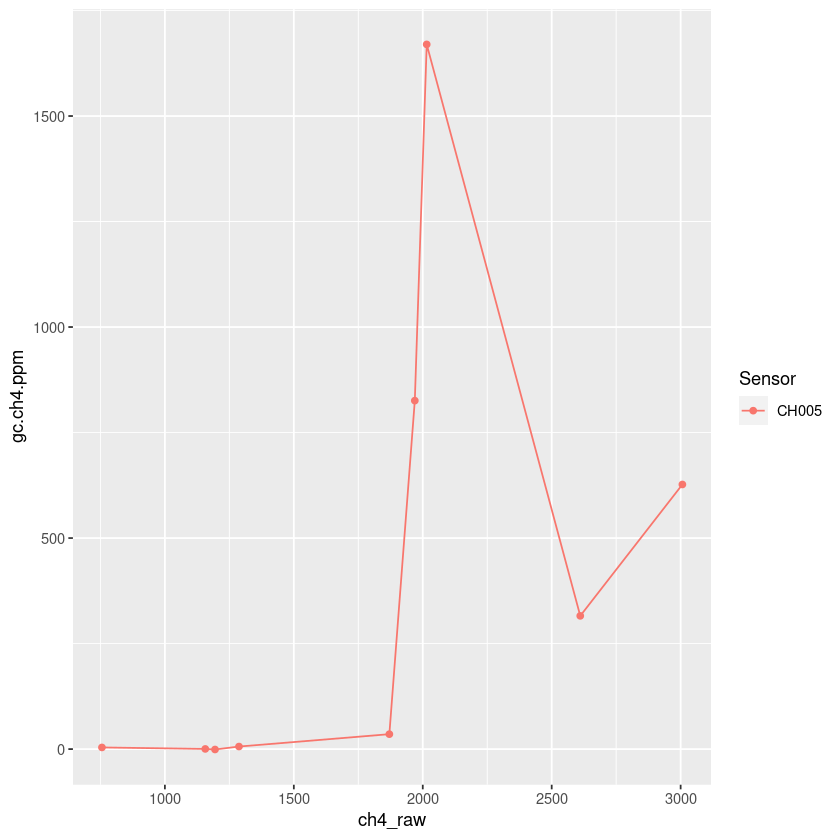

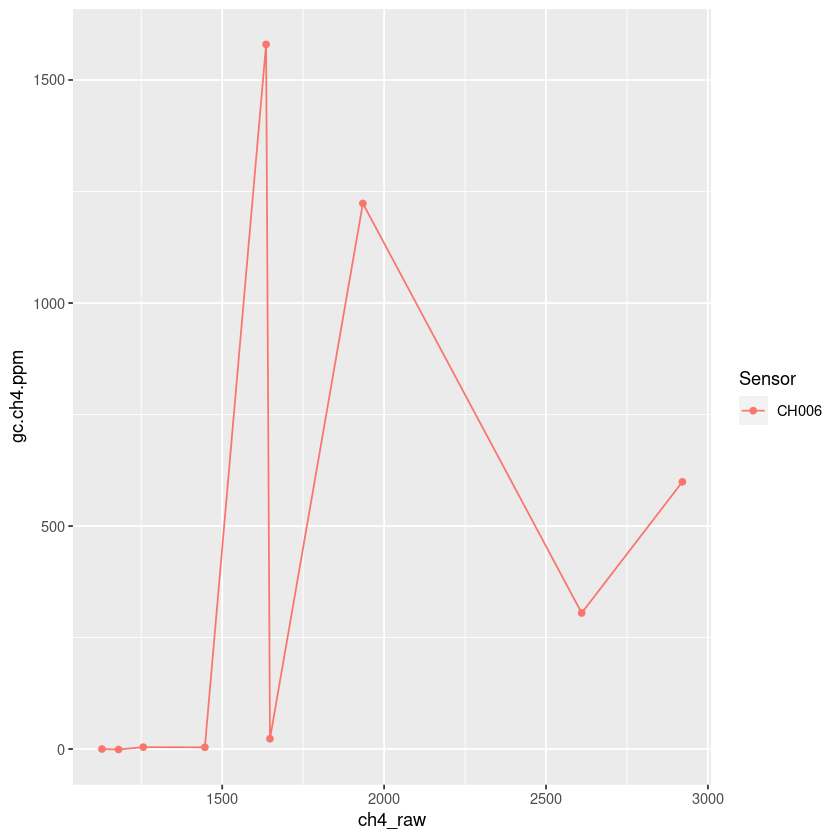

In [17]:
ggplot(output,aes(x=ch4_raw,y=gc.ch4.ppm,color=Sensor))+geom_point()+geom_line()

for(sensor in sensors){
    subset<-output[output$Sensor == sensor,]
    print(ggplot(subset,aes(x=ch4_raw,y=gc.ch4.ppm,color=Sensor))+geom_point()+geom_line())
}

# Apply Bastviken equations

In [116]:
output<-calcSensorResistance(output)
output

Sample.ID,Sensor.UUID,Date.Collected,Time.Collected,target.ch4.ppm,volume..mL.,mL.injected,CH4.injected..ppm.,calculated.ppm,gc.ch4.ppm,⋯,BDA_mol,MW_gas,aH_gm3,v0,ch4_mV,v0_mV,Rs_mΩ,ch4_V,v0_V,Rs_Ω
<chr>,<fct>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CH001.gcd,57FF70068387575129270167,2023-02-21,12:03,1000,810,1.0,1000000,1235,959.09528600,⋯,0.5299396,23.82062,3.456767,1877.9499,1949.9268,2292.4193,1324.355580,1.9499268,2.2924193,1.324355580
CH002.gcd,57FF6C068387575136470767,2023-02-21,12:04,1000,810,1.0,1000000,1235,1079.53234000,⋯,0.7114197,25.80868,2.137217,1238.1248,1965.8691,1511.3828,668.653072,1.9658691,1.5113828,0.668653072
CH003.gcd,50FF6F068678545226521667,2023-02-21,12:05,1000,810,1.0,1000000,1235,635.96323600,⋯,0.5180676,23.69057,3.566771,539.8133,1011.1816,658.9518,598.789383,1.0111816,0.6589518,0.598789383
CH004.gcd,50FF6C068678545210222467,2023-02-21,12:06,1000,920,1.0,1000000,1087,644.93604100,⋯,0.5879396,24.45599,3.072436,570.3620,3512.5000,696.2427,68.509927,3.5125000,0.6962427,0.068509927
CH005.gcd,57FF6E068387575145101167,2023-02-21,12:08,1000,920,1.0,1000000,1087,626.97373900,⋯,0.6144235,24.74612,2.872038,635.5348,3670.3857,775.7993,66.530197,3.6703857,0.7757993,0.066530197
CH006.gcd,57FF74068387575109431367,2023-02-21,12:09,1000,920,1.0,1000000,1087,599.08165400,⋯,0.6174631,24.77942,2.854239,582.6045,3565.7471,711.1871,66.699414,3.5657471,0.7111871,0.066699414
1221314.gcd,57FF70068387575129270167,2023-02-22,13:14,100,810,0.1,1000000,123,45.18918274,⋯,0.6241372,24.85253,2.785508,1840.4547,1878.5889,2246.6488,1355.791150,1.8785889,2.2466488,1.355791150
2221315.gcd,57FF6C068387575136470767,2023-02-22,13:15,100,810,0.1,1000000,123,73.75139998,⋯,0.7054903,25.74373,2.173797,1246.4647,1829.3457,1521.5634,758.156835,1.8293457,1.5215634,0.758156835
3221316.gcd,50FF6F068678545226521667,2023-02-22,13:16,100,810,0.1,1000000,123,39.07679862,⋯,0.5198622,23.71023,3.553369,538.8224,821.6797,657.7422,770.263432,0.8216797,0.6577422,0.770263432


In [18]:
# vc=5 # 5volts
# vl= #sensor reading
# v0

In [65]:
# # convert adc readings to voltages
# # 12 bit
# # output$ch4_mV<-5000/4096*output$ch4_raw
# # output$v0_mV<-5000/4096*output$v0
# output$ch4_V<-5/4096*output$ch4_raw
# output$v0_V<-5/4096*output$v0

In [103]:
head(output)

,Sample.ID,Sensor.UUID,Date.Collected,Time.Collected,target.ch4.ppm,volume..mL.,mL.injected,CH4.injected..ppm.,calculated.ppm,gc.ch4.ppm,⋯,ews_mbar,ews_kPa,H2O_mol,BDA_mol,MW_gas,aH_gm3,v0,ch4_V,v0_V,Rs_Ω
,<chr>,<fct>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CH001.gcd,57FF70068387575129270167,2023-02-21,12:03,1000,810,1,1000000,1235,959.0953,⋯,20.61856,2.061856,0.4700604,0.5299396,23.82062,3.456767,1877.9499,1.949927,2.2924193,1.32435558
2,CH002.gcd,57FF6C068387575136470767,2023-02-21,12:04,1000,810,1,1000000,1235,1079.5323,⋯,16.41796,1.641796,0.2885803,0.7114197,25.80868,2.137217,1238.1248,1.965869,1.5113828,0.66865307
3,CH003.gcd,50FF6F068678545226521667,2023-02-21,12:05,1000,810,1,1000000,1235,635.9632,⋯,16.78069,1.678069,0.4819324,0.5180676,23.69057,3.566771,539.8133,1.011182,0.6589518,0.59878938
4,CH004.gcd,50FF6C068678545210222467,2023-02-21,12:06,1000,920,1,1000000,1087,644.9360,⋯,13.17098,1.317098,0.4120604,0.5879396,24.45599,3.072436,570.3620,3.512500,0.6962427,0.06850993
5,CH005.gcd,57FF6E068387575145101167,2023-02-21,12:08,1000,920,1,1000000,1087,626.9737,⋯,13.61653,1.361653,0.3855765,0.6144235,24.74612,2.872038,635.5348,3.670386,0.7757993,0.06653020
6,CH006.gcd,57FF74068387575109431367,2023-02-21,12:09,1000,920,1,1000000,1087,599.0817,⋯,12.88154,1.288154,0.3825369,0.6174631,24.77942,2.854239,582.6045,3.565747,0.7111871,0.06669941


In [121]:
# output
saveDFcsv(output,od=getwd())

[1] "/home/pleocavee/Documents/github/SensorDataProcessing/rriv_methane/output.csv"


In [79]:
# # output$Rs_mV = (5000/output$ch4_mV-1)/(5000/output$v0_mV-1)*1000
# output$Rs_Ω = (5/output$ch4_V-1)/(5/output$v0_V-1)

In [78]:
# ggplot(output, aes(Rs_mV, gc.ch4.ppm, color=Sensor))+geom_point()

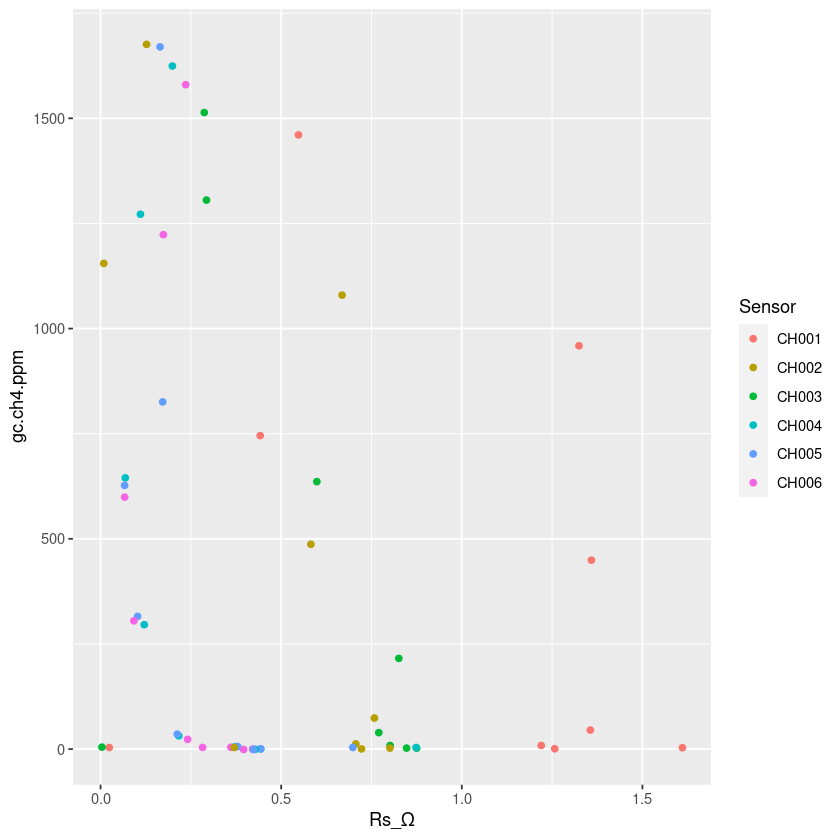

In [104]:
ggplot(output, aes(Rs_Ω, gc.ch4.ppm, color=Sensor))+geom_point()

In [105]:
sensors<-unique(output$Sensor)
sensors

[1] CH001 CH002 CH003 CH004 CH005 CH006
Levels: CH001 CH002 CH003 CH004 CH005 CH006

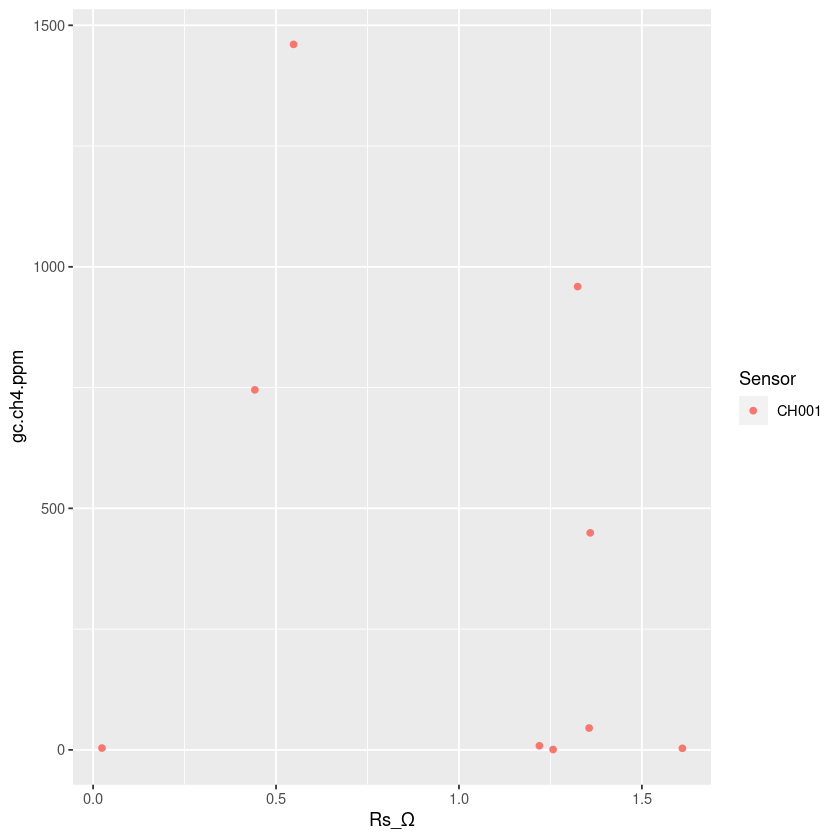

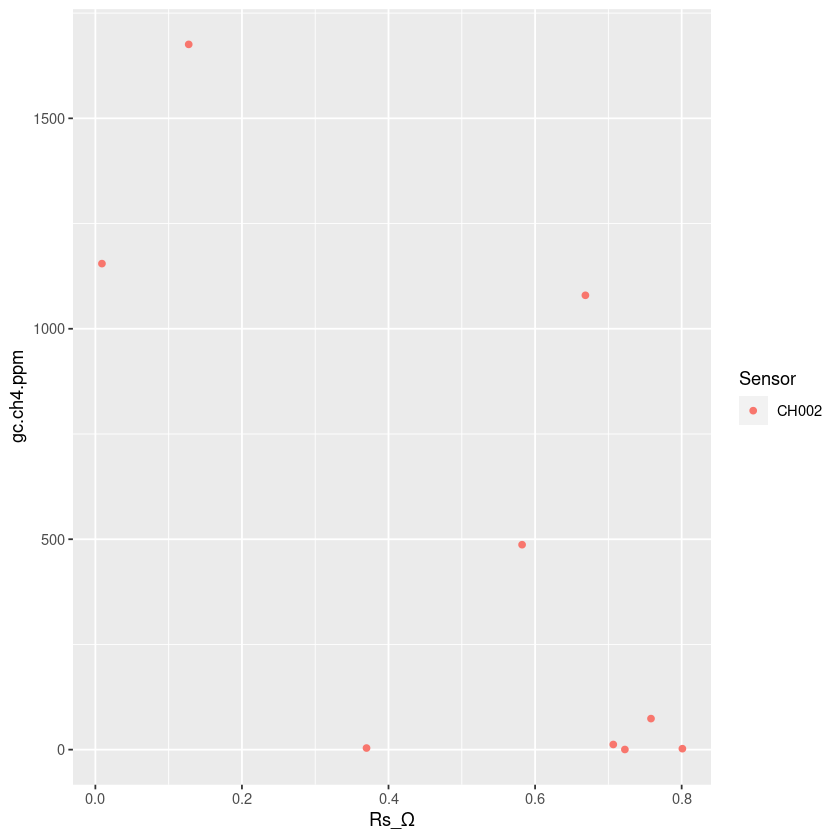

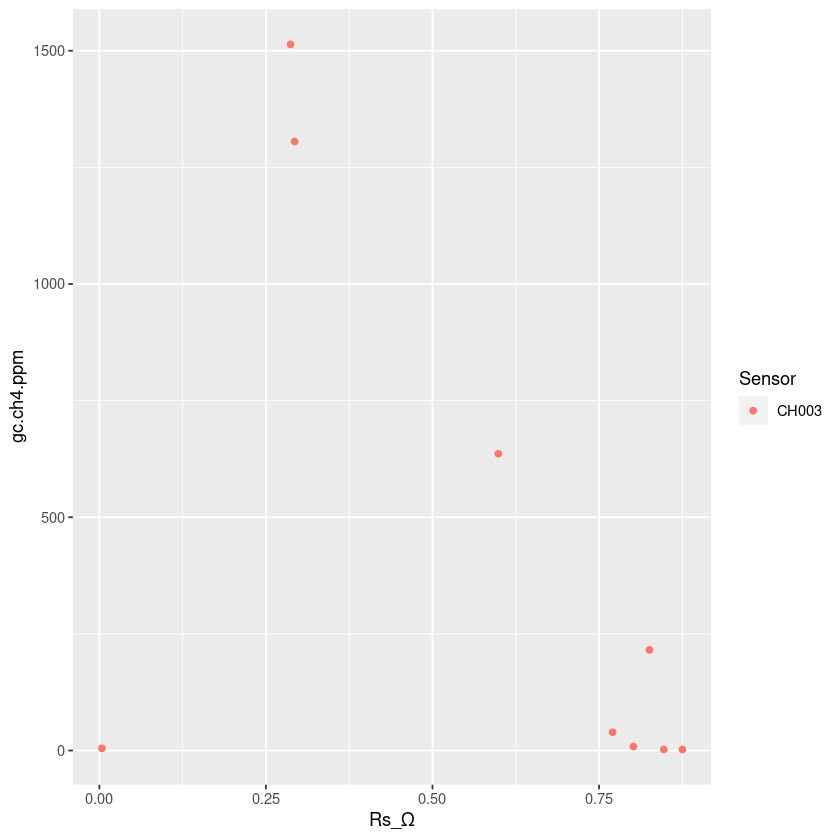

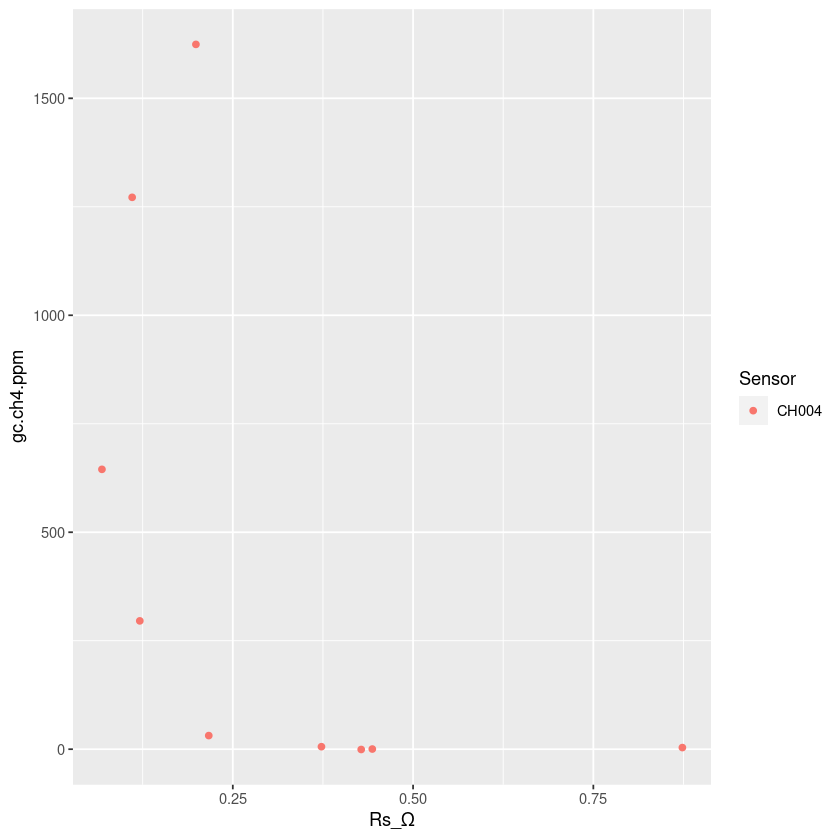

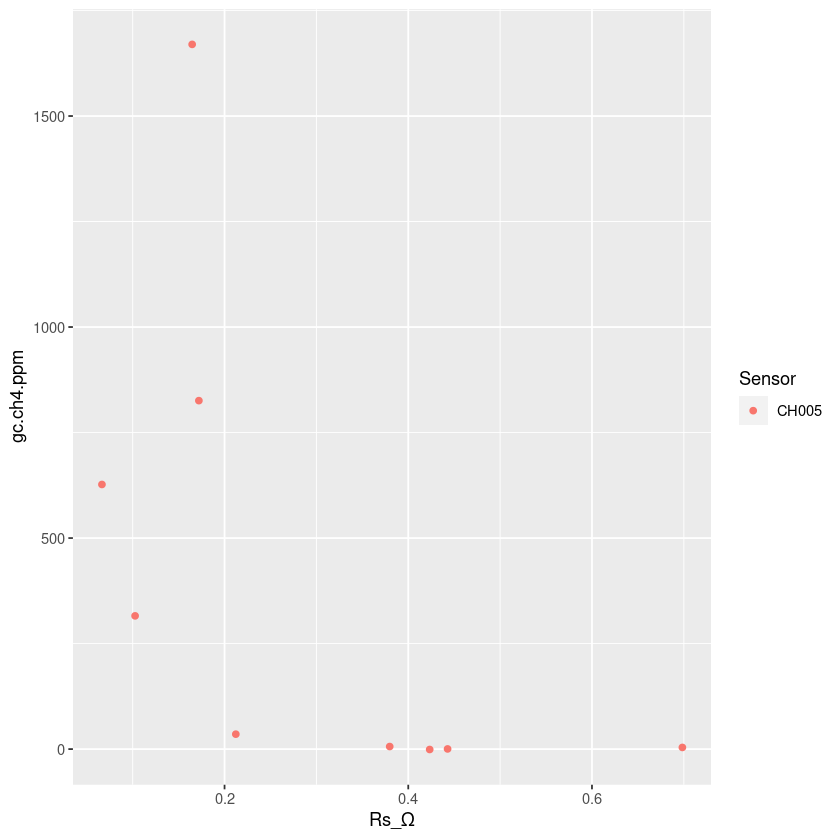

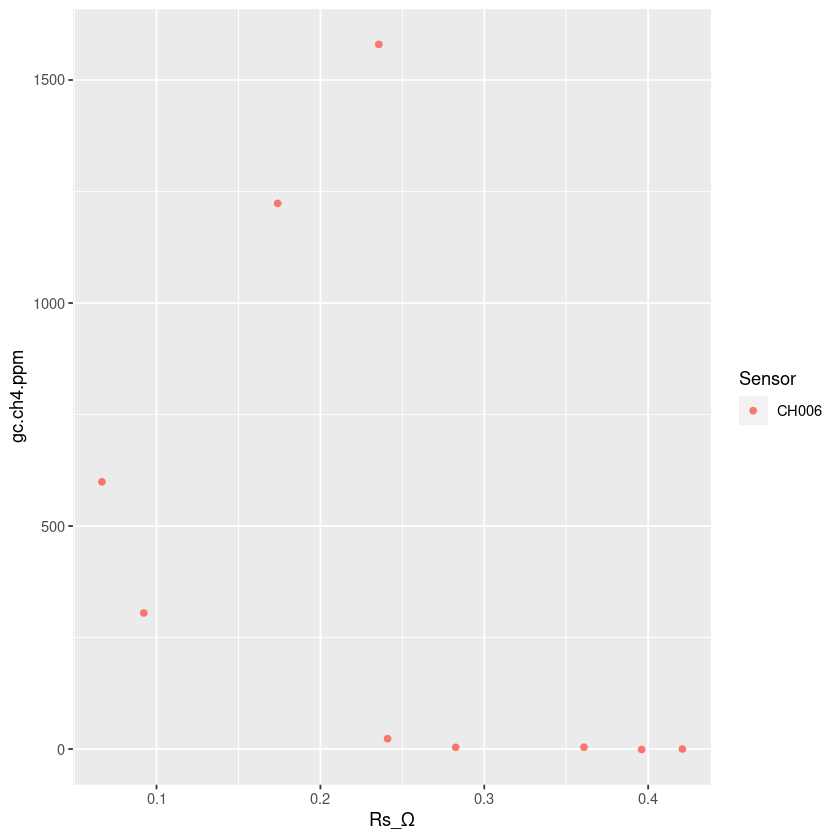

In [107]:
for(sensor in sensors){
    print(ggplot(output[output$Sensor==sensor,], aes(Rs_Ω, gc.ch4.ppm, color=Sensor))+geom_point())
}

In [108]:
# ggplot(output[output$Sensor=="CH001",], aes(Rs_Ω, gc.ch4.ppm, color=Sensor))+geom_point()
# ggplot(output[output$Sensor=="CH002",], aes(Rs_Ω, gc.ch4.ppm, color=Sensor))+geom_point()
# ggplot(output[output$Sensor=="CH003",], aes(Rs_Ω, gc.ch4.ppm, color=Sensor))+geom_point()
# ggplot(output[output$Sensor=="CH004",], aes(Rs_Ω, gc.ch4.ppm, color=Sensor))+geom_point()
# ggplot(output[output$Sensor=="CH005",], aes(Rs_Ω, gc.ch4.ppm, color=Sensor))+geom_point()
# ggplot(output[output$Sensor=="CH006",], aes(Rs_Ω, gc.ch4.ppm, color=Sensor))+geom_point()

In [109]:
# names(output)

In [110]:
# levels(output$Sensor)

In [48]:
directory
outputDirectory<-paste0(directory,"bastvikenEquations_output/")
newDir(outputDirectory)

[1] "~/Desktop/data/Methane Calibration/"

Output directory not found, creating: ~/Desktop/data/Methane Calibration/bastvikenEquations_output/


# Create LMs and save them using Bastviken 2020 equation table 2 #8?

In [ ]:
### test other lms?
# 1. "gc.ch4.ppm~Rs_Ω*dht_C*aH_gm3"
# 2. 

In [82]:
# for each sensor
# TODO: preserve the lm's produced for each sensor for use with predict()
lm_output<-vector('list',length(sensors))
names(lm_output)<-sensors
# str(lm_output)

for(sensor in sensors){
    temp<-output[output$Sensor == sensor,]
    print(sensor)
    temp_lm<-lm(data=temp, formula=gc.ch4.ppm~Rs_Ω*dht_C*aH_gm3)
    lm_output[[sensor]]<-temp_lm
    print(summary( lm_output[[sensor]] ))
    
    outFile<-paste0(outputDirectory, sensor,"_bastviken_lm.txt")
    writeLines<-capture.output(summary( lm_output[[sensor]] ))
    writeFile(writeLines, outFile)
}

outFile<-paste0(outputDirectory,"bastviken_lm.rds")
saveRDS(lm_output,outFile)

[1] "CH001"

Call:
lm(formula = gc.ch4.ppm ~ Rs_Ω * dht_C * aH_gm3, data = temp)

Residuals:
       1        7       13       19       25       31       37       43 
 0.27655 -0.35301  0.95931 -0.22844 -0.03464 -1.22927 -2.50047 -2.74381 
      49 
 5.85379 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)        581768.7    15015.4   38.74   0.0164 *
Rs_Ω              -583887.1    16611.2  -35.15   0.0181 *
dht_C              -23797.3      660.0  -36.05   0.0177 *
aH_gm3            -138880.6     3088.3  -44.97   0.0142 *
Rs_Ω:dht_C          23186.1      702.0   33.03   0.0193 *
Rs_Ω:aH_gm3        164173.1     4241.6   38.70   0.0164 *
dht_C:aH_gm3         5715.5      134.6   42.46   0.0150 *
Rs_Ω:dht_C:aH_gm3   -6504.7      177.6  -36.62   0.0174 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.123 on 1 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:  0.9998 
F-statistic:  6508 on 7 

## HARDCODED check on one sensor - CH002
TODO: include floating bucket data v0 for the lm merge gas analyzer data and GC data columns

In [173]:
v0inputFile<-"~/Desktop/data/Methane Calibration/V0_tests_output/df_V0_input.csv"
v0data<-read.csv(v0inputFile)
head(v0data)

,X,site,measurementCycle,type,deployment,deployed_at,uuid,time.s,time.h,battery.V,⋯,ch4rf_cal,ch4_raw,ch4_cal,dht_C,dht_RH,ch4_ppm,dht_K,ews_mbar,ews_kPa,aH_gm3
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,C1,9,summary,floatWaterBin-57FF70068387575129270167-1675266374,1675266374,57FF70068387575129270167,1675355547,2023-02-02 16:32:27,1347.6,⋯,0,1507.78,0,31.18,20.78,1.995856,304.33,37.904370,3.7904370,5.6079855
2,2,C1,2344,summary,floatWaterBin-57FF70068387575129270167-1675266374,1675266374,57FF70068387575129270167,1676064747,2023-02-10 21:32:27,1332.2,⋯,0,1476.56,0,26.90,19.30,1.993235,300.05,24.209121,2.4209121,3.3741122
3,3,C1,18695,summary,floatWaterBin-57FF70068387575129270167-1675266374,1675266374,57FF70068387575129270167,1675459947,2023-02-03 21:32:27,1077.2,⋯,0,833.32,0,10.55,13.95,1.980556,283.70,3.794393,0.3794393,0.4042723
4,4,C1,18719,summary,floatWaterBin-57FF70068387575129270167-1675266374,1675266374,57FF70068387575129270167,1675697547,2023-02-06 15:32:27,1291.8,⋯,0,1324.64,0,26.19,18.29,2.110601,299.34,22.442721,2.2442721,2.9712642
5,5,C1,18743,summary,floatWaterBin-57FF70068387575129270167-1675266374,1675266374,57FF70068387575129270167,1675783947,2023-02-07 15:32:27,1356.6,⋯,0,1578.84,0,28.90,20.51,1.993679,302.05,29.904326,2.9904326,4.3998479
6,6,C2,41032,summary,floatWaterBin-57FF6C068387575136470767-1675179576,1675179576,57FF6C068387575136470767,1675459948,2023-02-03 21:32:27,1056.2,⋯,0,754.60,0,11.15,10.40,1.980557,284.30,4.078713,0.4078713,0.3232931


In [161]:
UUIDdict<- c(
    '57FF70068387575129270167' = 'CH001',
    '57FF6C068387575136470767' = 'CH002',
    '50FF6F068678545226521667' = 'CH003',
    '50FF6C068678545210222467' = 'CH004',
    '57FF6E068387575145101167' = 'CH005',
    '57FF74068387575109431367' = 'CH006'
)

v0data<-createSensorColFromIDs(v0data, idCol="uuid", dict=UUIDdict)
# v0data
names(v0data)

[1] "X"                "site"             "measurementCycle" "type"            
 [5] "deployment"       "deployed_at"      "uuid"             "time.s"          
 [9] "time.h"           "battery.V"        "ch4rf_raw"        "ch4rf_cal"       
[13] "ch4_raw"          "ch4_cal"          "dht_C"            "dht_RH"          
[17] "ch4_ppm"          "dht_K"            "ews_mbar"         "ews_kPa"         
[21] "aH_gm3"           "Sensor"

In [200]:
CH002v0<-v0data[v0data$uuid=="57FF6C068387575136470767",]
CH002v0<-process_rriv_columns(CH002v0)

CH002data<-output[output$Sensor=="CH002",]
CH002data<-process_rriv_columns(CH002data)

In [194]:
# head(CH002v0)

In [195]:
# head(CH002data)

In [165]:
names(CH002v0)
names(CH002data)

[1] "X"                "site"             "measurementCycle" "type"            
 [5] "deployment"       "deployed_at"      "uuid"             "time.s"          
 [9] "time.h"           "battery.V"        "ch4rf_raw"        "ch4rf_cal"       
[13] "ch4_raw"          "ch4_cal"          "dht_C"            "dht_RH"          
[17] "ch4_ppm"          "dht_K"            "ews_mbar"         "ews_kPa"         
[21] "aH_gm3"           "Sensor"

[1] "Sample.ID"          "Sensor.UUID"        "Date.Collected"    
 [4] "Time.Collected"     "target.ch4.ppm"     "volume..mL."       
 [7] "mL.injected"        "CH4.injected..ppm." "calculated.ppm"    
[10] "gc.ch4.ppm"         "Date.Run"           "Sensor"            
[13] "site"               "deployed_at"        "measurementCycle"  
[16] "type"               "deployment"         "uuid"              
[19] "time.s"             "time.h"             "battery.V"         
[22] "ch4rf_raw"          "ch4rf_cal"          "ch4_raw"           
[25] "ch4_cal"            "dht_C"              "dht_RH"            
[28] "relative_hour"      "dht_K"              "ews_mbar"          
[31] "ews_kPa"            "H2O_mol"            "BDA_mol"           
[34] "MW_gas"             "aH_gm3"             "v0"                
[37] "ch4_mV"             "v0_mV"              "Rs_mΩ"             
[40] "ch4_V"              "v0_V"               "Rs_Ω"

In [223]:
#new column where gc ch4 values match in both dataframes
CH002v0$gc.ch4.ppm<-CH002v0$ch4_ppm
head(CH002v0)

,X,site,measurementCycle,type,deployment,deployed_at,uuid,time.s,time.h,battery.V,⋯,ch4_raw,ch4_cal,dht_C,dht_RH,ch4_ppm,dht_K,ews_mbar,ews_kPa,aH_gm3,gc.ch4.ppm
,<int>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<dttm>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,6,C2,41032,summary,floatWaterBin-57FF6C068387575136470767-1675179576,1675179576,57FF6C068387575136470767,1675459948,2023-02-03 21:32:27,1056.2,⋯,754.60,0,11.15,10.40,1.980557,284.30,4.078713,0.4078713,0.3232931,1.980557
7,7,C2,42076,summary,floatWaterBin-57FF6C068387575136470767-1675179576,1675179576,57FF6C068387575136470767,1675355547,2023-02-02 16:32:27,1323.4,⋯,1436.86,0,31.72,15.11,1.995856,304.87,40.070170,4.0070170,4.3031629,1.995856
8,8,C2,42092,summary,floatWaterBin-57FF6C068387575136470767-1675179576,1675179576,57FF6C068387575136470767,1675697548,2023-02-06 15:32:28,1273.4,⋯,1262.06,0,26.49,13.30,2.110608,299.64,23.173931,2.3173931,2.2287861,2.110608
9,9,C2,42101,summary,floatWaterBin-57FF6C068387575136470767-1675179576,1675179576,57FF6C068387575136470767,1676064747,2023-02-10 21:32:27,1282.4,⋯,1315.86,0,27.80,14.40,1.993235,300.95,26.634086,2.6634086,2.7613584,1.993235
10,10,C2,42116,summary,floatWaterBin-57FF6C068387575136470767-1675179576,1675179576,57FF6C068387575136470767,1675783948,2023-02-07 15:32:27,1302.6,⋯,1370.54,0,28.85,15.06,1.993682,302.00,29.747928,2.9747928,3.2143383,1.993682


In [197]:
# str(CH002v0)

In [198]:
# str(CH002data)

In [224]:
CH002full<-bind_rows(CH002v0,CH002data)

In [227]:
CH002full<-calcAbsoluteHumidity(CH002full)
CH002full<-createSensorColFromIDs(CH002full,idCol="uuid", UUIDdict)

v0File<-"~/Desktop/data/Methane Calibration/V0_tests_output/V0_lm_CH001-CH006.rds"
CH002full<-calcV0(CH002full, v0File)

CH002full<-calcSensorResistance(CH002full)

[1] "CH002"

Call:
lm(formula = ch4_raw ~ dht_C * aH_gm3, data = subset)

Coefficients:
 (Intercept)         dht_C        aH_gm3  dht_C:aH_gm3  
     447.524        20.447       334.416        -8.043  



In [229]:
CH002full[c("Sensor","uuid","gc.ch4.ppm","dht_C","dht_RH","aH_gm3")]

Sensor,uuid,gc.ch4.ppm,dht_C,dht_RH,aH_gm3
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
CH002,57FF6C068387575136470767,1.9805570,11.15,10.400,0.3232931
CH002,57FF6C068387575136470767,1.9958558,31.72,15.110,4.3031629
CH002,57FF6C068387575136470767,2.1106079,26.49,13.300,2.2287861
CH002,57FF6C068387575136470767,1.9932348,27.80,14.400,2.7613584
CH002,57FF6C068387575136470767,1.9936816,28.85,15.060,3.2143383
CH002,57FF6C068387575136470767,1079.5323400,23.30,17.810,2.1372169
CH002,57FF6C068387575136470767,73.7514000,24.30,16.300,2.1737971
CH002,57FF6C068387575136470767,12.2676318,24.30,18.110,2.4151819
CH002,57FF6C068387575136470767,2.2963301,25.40,16.110,2.4107580


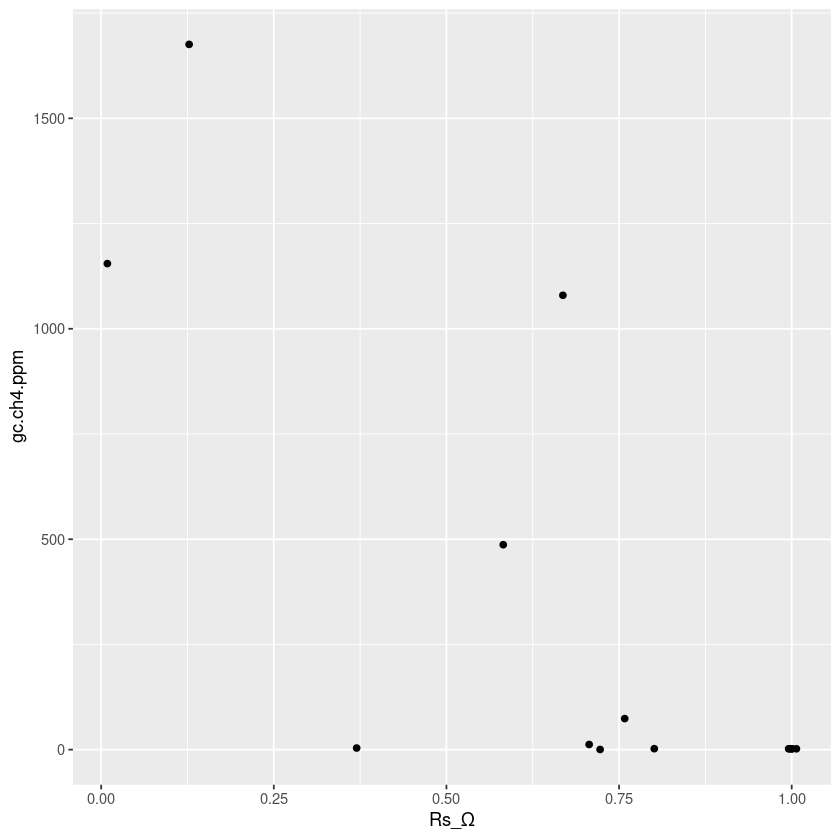

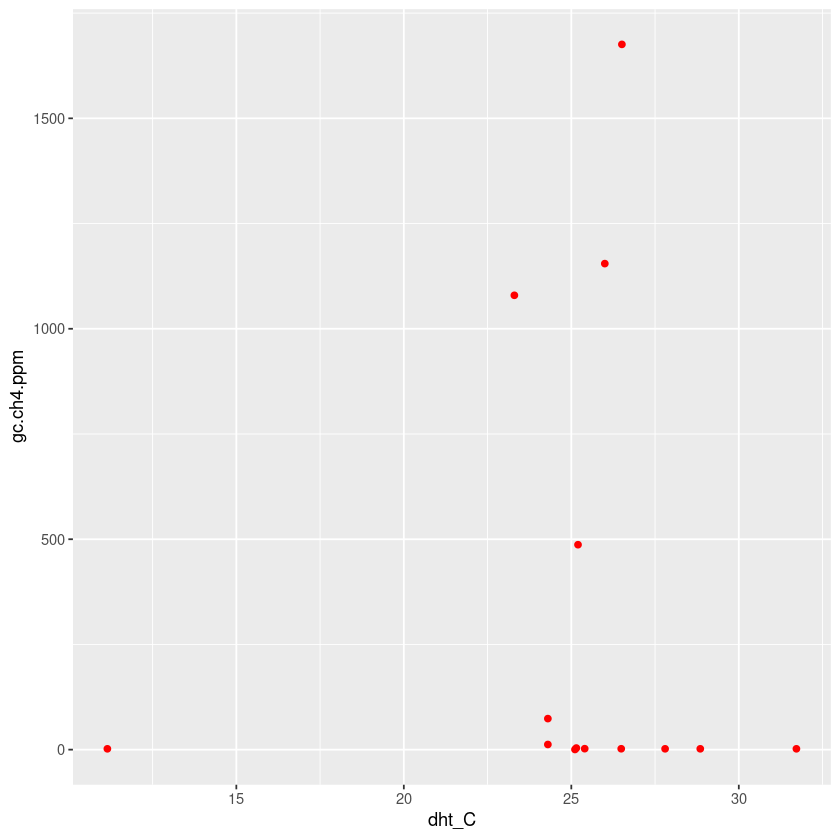

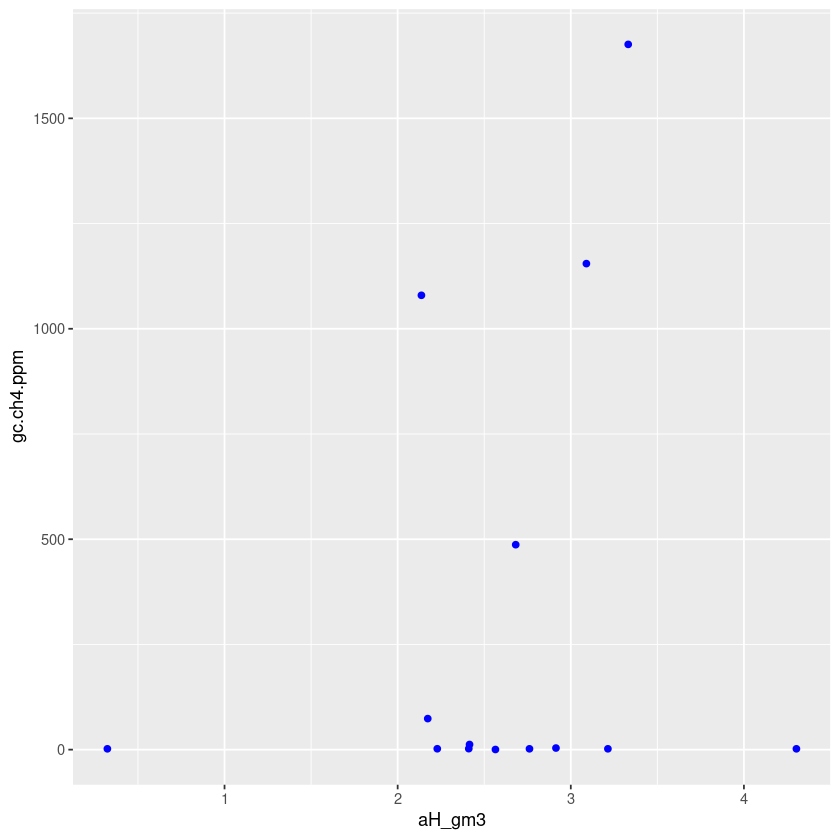

In [230]:
ggplot(CH002full, aes(x=Rs_Ω, y=gc.ch4.ppm))+geom_point(color="black")
ggplot(CH002full, aes(x=dht_C, y=gc.ch4.ppm))+geom_point(color="red")
ggplot(CH002full, aes(x=aH_gm3, y=gc.ch4.ppm))+geom_point(color="blue")

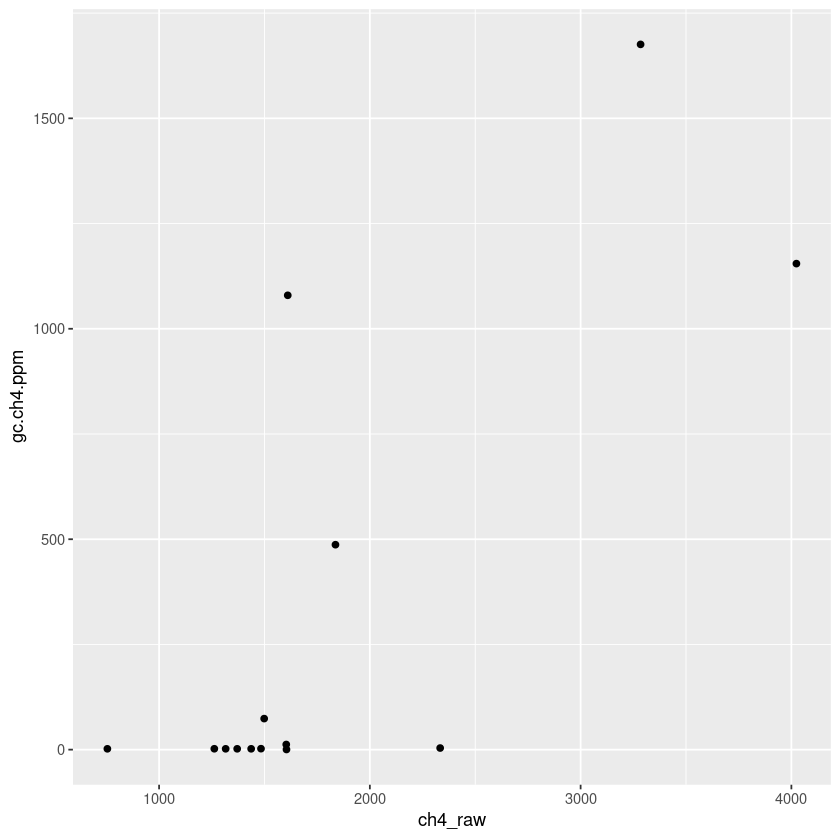

In [262]:
ggplot(CH002full, aes(x=ch4_raw, y=gc.ch4.ppm))+geom_point(color="black")

In [267]:
# outFile<-paste0(outputDirectory, sensor,"_bastviken_lm.txt")
#     writeLines<-capture.output(summary( lm_output[[sensor]] ))
#     writeFile(writeLines, outFile)
#TODO turn this into function? can you deparse the object if it's turned into a variable?
# or will it get the variable name instead?
outFile<-paste0(getwd(),"/",deparse(substitute(CH002full_lm_additive)),".txt")
writeLines(capture.output(summary(CH002full_lm_additive)))
writeFile(writeLines, outFile)

[1] "/home/pleocavee/Documents/github/SensorDataProcessing/rriv_methane/CH002full_lm_additive,txt"

In [236]:
# subset this data to one sensor, create lm, apply predict on it
# import field data, subset one sensor, apply predict on it
# compare results

CH002full_lm_additive<-lm(data=CH002full, formula=gc.ch4.ppm~Rs_Ω+dht_C+aH_gm3)
summary(CH002full_lm_additive)
CH002full$add<-predict(CH002full_lm_additive,newdata=CH002full)



CH002full_lm_interactive<-lm(data=CH002full, formula=gc.ch4.ppm~Rs_Ω*dht_C*aH_gm3)
summary(CH002full_lm_interactive)
CH002full$int<-predict(CH002full_lm_interactive,newdata=CH002full)


Call:
lm(formula = gc.ch4.ppm ~ Rs_Ω + dht_C + aH_gm3, data = CH002full)

Residuals:
    Min      1Q  Median      3Q     Max 
-749.14 -170.39   37.41   87.38  726.86 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1300.447    917.278   1.418   0.1867  
Rs_Ω        -1292.472    411.342  -3.142   0.0105 *
dht_C          -6.744     76.271  -0.088   0.9313  
aH_gm3         34.427    408.961   0.084   0.9346  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 413.7 on 10 degrees of freedom
Multiple R-squared:  0.5828,	Adjusted R-squared:  0.4577 
F-statistic: 4.657 on 3 and 10 DF,  p-value: 0.0276



Call:
lm(formula = gc.ch4.ppm ~ Rs_Ω * dht_C * aH_gm3, data = CH002full)

Residuals:
    Min      1Q  Median      3Q     Max 
-300.61  -49.14   -7.26   58.20  370.68 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)        145622.9    31565.7   4.613  0.00364 **
Rs_Ω              -145832.7    31582.0  -4.618  0.00362 **
dht_C               -5609.2     1289.1  -4.351  0.00482 **
aH_gm3             -55348.3    11551.9  -4.791  0.00303 **
Rs_Ω:dht_C           5657.1     1289.9   4.386  0.00464 **
Rs_Ω:aH_gm3         53918.0    11545.6   4.670  0.00343 **
dht_C:aH_gm3         2145.7      441.2   4.863  0.00281 **
Rs_Ω:dht_C:aH_gm3   -2109.7      441.6  -4.778  0.00307 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 229.9 on 6 degrees of freedom
Multiple R-squared:  0.9227,	Adjusted R-squared:  0.8326 
F-statistic: 10.24 on 7 and 6 DF,  p-value: 0.005739


In [255]:
# what if LMs use ch4_raw instead of Rs?
CH002full_lm_add_ch4<-lm(data=CH002full, formula=gc.ch4.ppm~ch4_raw+dht_C+aH_gm3)
summary(CH002full_lm_add_ch4)
CH002full$add_ch4<-predict(CH002full_lm_add_ch4,newdata=CH002full)

CH002full_lm_int_ch4<-lm(data=CH002full, formula=gc.ch4.ppm~ch4_raw*dht_C*aH_gm3)
summary(CH002full_lm_int_ch4)
CH002full$int_ch4<-predict(CH002full_lm_int_ch4,newdata=CH002full)


Call:
lm(formula = gc.ch4.ppm ~ ch4_raw + dht_C + aH_gm3, data = CH002full)

Residuals:
    Min      1Q  Median      3Q     Max 
-584.40 -193.41  -28.19   12.49  827.52 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -137.5960  1028.0896  -0.134  0.89619   
ch4_raw        0.5232     0.1604   3.262  0.00854 **
dht_C        -18.5076    72.9247  -0.254  0.80480   
aH_gm3       -10.2001   406.4902  -0.025  0.98047   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 406 on 10 degrees of freedom
Multiple R-squared:  0.5984,	Adjusted R-squared:  0.4779 
F-statistic: 4.966 on 3 and 10 DF,  p-value: 0.02306



Call:
lm(formula = gc.ch4.ppm ~ ch4_raw * dht_C * aH_gm3, data = CH002full)

Residuals:
    Min      1Q  Median      3Q     Max 
-316.90 -187.39  -68.92  159.75  556.28 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)          -1.552e+04  1.036e+04  -1.497   0.1849  
ch4_raw               1.756e+01  1.192e+01   1.473   0.1911  
dht_C                 7.297e+02  6.654e+02   1.097   0.3148  
aH_gm3                9.551e+03  7.726e+03   1.236   0.2626  
ch4_raw:dht_C        -7.582e-01  6.262e-01  -1.211   0.2715  
ch4_raw:aH_gm3       -8.380e+00  5.498e+00  -1.524   0.1783  
dht_C:aH_gm3         -4.177e+02  2.327e+02  -1.795   0.1227  
ch4_raw:dht_C:aH_gm3  3.546e-01  1.751e-01   2.026   0.0892 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.6 on 6 degrees of freedom
Multiple R-squared:  0.7937,	Adjusted R-squared:  0.5531 
F-statistic: 3.298 on 7 and 6 DF,  p-value: 0.08359


In [257]:
# display input and results of LMs
CH002full[c("Sensor","uuid","ch4_raw","Rs_Ω","gc.ch4.ppm","dht_C",
            "dht_RH","aH_gm3","add","int", "add_ch4", "int_ch4")]

Sensor,uuid,ch4_raw,Rs_Ω,gc.ch4.ppm,dht_C,dht_RH,aH_gm3,add,int,add_ch4,int_ch4
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CH002,57FF6C068387575136470767,754.60,1.000047829,1.9805570,11.15,10.400,0.3232931,-56.15343,-12.037731,47.577472,-4.517495
CH002,57FF6C068387575136470767,1436.86,1.000433630,1.9958558,31.72,15.110,4.3031629,-58.36161,57.558772,-16.738612,121.324846
CH002,57FF6C068387575136470767,1262.06,0.997214073,2.1106079,26.49,13.300,2.2287861,-90.34407,-3.102183,9.754021,104.502466
CH002,57FF6C068387575136470767,1315.86,1.006824126,1.9932348,27.80,14.400,2.7613584,-93.26451,-76.247085,8.226656,-180.461892
CH002,57FF6C068387575136470767,1370.54,0.995532045,1.9936816,28.85,15.060,3.2143383,-70.15622,-65.878224,12.783558,-260.525391
CH002,57FF6C068387575136470767,1610.44,0.668653072,1079.5323400,23.30,17.810,2.1372169,352.67300,915.089199,252.010711,523.250902
CH002,57FF6C068387575136470767,1498.60,0.758156835,73.7514000,24.30,16.300,2.1737971,231.50716,374.358152,174.611765,390.650365
CH002,57FF6C068387575136470767,1603.34,0.706673474,12.2676318,24.30,18.110,2.4151819,306.35819,186.168037,226.952906,301.002695
CH002,57FF6C068387575136470767,1483.50,0.800977326,2.2963301,25.40,16.110,2.4107580,176.90230,29.371163,143.935594,189.718266


In [240]:
fieldDataFile<-"~/Desktop/data/Methane Calibration/field_test/20230317_deployment_output/summary_rd_calibrated.csv"
fieldData<-read.csv(fieldDataFile)

In [212]:
# summary(CH002lm)

In [242]:
process_rriv_columns(fieldData)
summaryCH002field<-fieldData[fieldData$type=="summary" &fieldData$uuid=="57FF6C068387575136470767",]
# head(summarylines)

summaryCH002field<-calcAbsoluteHumidity(summaryCH002field)

#manual dictionary to link UUIDs to sensors
UUIDdict<- c(
    '57FF70068387575129270167' = 'CH001',
    '57FF6C068387575136470767' = 'CH002',
    '50FF6F068678545226521667' = 'CH003',
    '50FF6C068678545210222467' = 'CH004',
    '57FF6E068387575145101167' = 'CH005',
    '57FF74068387575109431367' = 'CH006'
)

summaryCH002field<-createSensorColFromIDs(summaryCH002field,idCol = "uuid",dict = UUIDdict)

v0file<-"/home/pleocavee/Desktop/data/Methane Calibration/methane_calibration_v0_output/V0_lm_CH001-CH006.rds"
summaryCH002field<-calcV0(summaryCH002field, v0file)

summaryCH002field<-calcSensorResistance(summaryCH002field)



X,type,site,logger,deployment,deployed_at,uuid,time.s,time.h,battery.V,⋯,user_note,user_value,Sensor,ews_mbar,ews_kPa,aH_gm3,v0,ch4_V,v0_V,Rs_Ω
<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dttm>,<dbl>,⋯,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
77,summary,ACRE,kcdev,calCH003_field-50FF6F068678545226521667-1679068113,1679068113,50FF6F068678545226521667,1679068837,2023-03-17 16:00:37,1071,⋯,NA,NA,CH003,12.347847,1.2347847,1.584171,425.0158,0.746337891,0.5188181,0.6598573
152,summary,ACRE,kcdev,calCH003_field-50FF6F068678545226521667-1679068113,1679068113,50FF6F068678545226521667,1679068897,2023-03-17 16:01:37,1144,⋯,NA,NA,CH003,12.347847,1.2347847,1.653365,430.1403,1.026367188,0.5250736,0.4542754
227,summary,ACRE,kcdev,calCH003_field-50FF6F068678545226521667-1679068113,1679068113,50FF6F068678545226521667,1679068957,2023-03-17 16:02:37,1175,⋯,NA,NA,CH003,12.542028,1.2542028,1.756209,436.9362,1.188354492,0.5333694,0.3830139
302,summary,ACRE,kcdev,calCH003_field-50FF6F068678545226521667-1679068113,1679068113,50FF6F068678545226521667,1679069017,2023-03-17 16:03:37,1182,⋯,NA,NA,CH003,12.767430,1.2767430,1.830058,441.3983,1.228759766,0.5388163,0.3706874
377,summary,ACRE,kcdev,calCH003_field-50FF6F068678545226521667-1679068113,1679068113,50FF6F068678545226521667,1679069077,2023-03-17 16:04:37,1181,⋯,NA,NA,CH003,13.112616,1.3112616,1.891515,444.3838,1.228027344,0.5424607,0.3737951
452,summary,ACRE,kcdev,calCH003_field-50FF6F068678545226521667-1679068113,1679068113,50FF6F068678545226521667,1679069138,2023-03-17 16:05:37,1182,⋯,NA,NA,CH003,13.556322,1.3556322,1.953529,446.9283,1.221435547,0.5455668,0.3788888
527,summary,ACRE,kcdev,calCH003_field-50FF6F068678545226521667-1679068113,1679068113,50FF6F068678545226521667,1679069198,2023-03-17 16:06:37,1180,⋯,NA,NA,CH003,14.013977,1.4013977,2.011250,449.0538,1.217285156,0.5481613,0.3826311
602,summary,ACRE,kcdev,calCH003_field-50FF6F068678545226521667-1679068113,1679068113,50FF6F068678545226521667,1679069258,2023-03-17 16:07:37,1180,⋯,NA,NA,CH003,14.485985,1.4485985,2.066251,450.8817,1.216796875,0.5503927,0.3845852
677,summary,ACRE,kcdev,calCH003_field-50FF6F068678545226521667-1679068113,1679068113,50FF6F068678545226521667,1679069318,2023-03-17 16:08:37,1180,⋯,NA,NA,CH003,14.874205,1.4874205,2.106817,452.0334,1.219238281,0.5517986,0.3846688


[1] "CH002"

Call:
lm(formula = ch4_raw ~ dht_C * aH_gm3, data = subset)

Coefficients:
 (Intercept)         dht_C        aH_gm3  dht_C:aH_gm3  
     447.524        20.447       334.416        -8.043  



In [249]:
# clean data
cleanCH002field<-summaryCH002field[summaryCH002field$ch4_raw>0,]

In [258]:
# apply LMs
cleanCH002field$pAdd<-predict(CH002full_lm_additive,newdata=cleanCH002field)
cleanCH002field$pInt<-predict(CH002full_lm_interactive,newdata=cleanCH002field)

cleanCH002field$pAdd_ch4<-predict(CH002full_lm_add_ch4,newdata=cleanCH002field)
cleanCH002field$pInt_ch4<-predict(CH002full_lm_int_ch4,newdata=cleanCH002field)

In [264]:
saveDFcsv(cleanCH002field,tag = "withV0", od=getwd())

[1] "/home/pleocavee/Documents/github/SensorDataProcessing/rriv_methane/cleanCH002field_withV0.csv"


In [259]:
# display results
cleanCH002field[c("Sensor","uuid","ch4_raw","Rs_Ω","dht_C","dht_RH","aH_gm3","pAdd","pInt","pAdd_ch4","pInt_ch4")]

,Sensor,uuid,ch4_raw,Rs_Ω,dht_C,dht_RH,aH_gm3,pAdd,pInt,pAdd_ch4,pInt_ch4
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2395,CH002,57FF6C068387575136470767,486.7,2.543927,20.40,12.12,1.0658895,-2088.3908,-29048.138,-271.366055,892.4664
2396,CH002,57FF6C068387575136470767,589.0,2.062193,20.40,12.62,1.1098618,-1464.2502,-19499.142,-218.287972,997.2476
2397,CH002,57FF6C068387575136470767,675.4,1.777074,20.54,13.00,1.1607507,-1094.9334,-13510.112,-176.190884,1082.7244
2398,CH002,57FF6C068387575136470767,701.1,1.728796,20.84,13.26,1.2230041,-1032.4160,-11534.970,-168.931097,1111.0593
2399,CH002,57FF6C068387575136470767,699.8,1.764014,21.22,13.38,1.2856988,-1078.3389,-10765.496,-177.283673,1112.7241
2400,CH002,57FF6C068387575136470767,691.9,1.819942,21.66,13.36,1.3459630,-1151.5161,-10078.960,-190.175244,1103.6626
2401,CH002,57FF6C068387575136470767,682.9,1.875887,22.06,13.28,1.3964969,-1224.7812,-9443.234,-202.802816,1089.8693
2402,CH002,57FF6C068387575136470767,676.4,1.922696,22.42,13.22,1.4447007,-1286.0497,-8745.475,-213.358237,1073.0711
2403,CH002,57FF6C068387575136470767,673.3,1.954027,22.72,13.16,1.4848661,-1327.1845,-8059.650,-220.942223,1055.1156


In [263]:
# head(summarylines)


# end of hardcoded block

In [122]:
#TODO: predict using additive lm
for(sensor in sensors){
    temp<-output[output$Sensor == sensor,]
    print(sensor)
    temp_lm<-lm(data=temp, formula=gc.ch4.ppm~Rs_Ω+dht_C+aH_gm3)
    
    print(summary( temp_lm ))
}

[1] "CH001"

Call:
lm(formula = gc.ch4.ppm ~ Rs_Ω + dht_C + aH_gm3, data = temp)

Residuals:
      1       7      13      19      25      31      37      43      49 
 192.92  161.28  261.79 -255.03  -78.35 -289.25 -187.81  258.36  -63.91 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -5839.7     4155.6  -1.405   0.2189  
Rs_Ω           762.1      288.1   2.645   0.0457 *
dht_C           68.6      238.8   0.287   0.7854  
aH_gm3        1115.0      646.5   1.725   0.1452  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 280.3 on 5 degrees of freedom
Multiple R-squared:  0.8301,	Adjusted R-squared:  0.7281 
F-statistic: 8.142 on 3 and 5 DF,  p-value: 0.02272

[1] "CH002"

Call:
lm(formula = gc.ch4.ppm ~ Rs_Ω + dht_C + aH_gm3, data = temp)

Residuals:
      2       8      14      20      26      32      38      44      50 
 554.93 -177.87 -207.78   42.84  -59.75  159.36 -697.33  686.26 -300.66 

Coefficients:
   

In [86]:
# testRead<-readRDS(outFile)
# for(lm in testRead){
#     print(summary(lm))
# }

In [87]:
# timeNow<-Sys.time()
# timeNow

In [88]:
# output

In [89]:
# str(lm_output)

In [ ]:
# TODO deploy sensors (2xPWA, 1xACRE, 1xStream) = GC samples start and end, observed vs predicted(using lm)